In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections
import numpy as np
import pickle
from wordcloud import WordCloud, STOPWORDS # pip install wordcloud

In [4]:
# Fill paths
DEFAULT_DATASET_DIR = "data"  # where the datasets folders are
HOWTOVQA_PATH = os.path.join(DEFAULT_DATASET_DIR, "HowToVQA")  # Path where HowToVQA69M is downloaded / generated
IVQA_PATH = os.path.join(DEFAULT_DATASET_DIR, "iVQA")  # Path where iVQA is downloaded

# Figure 1

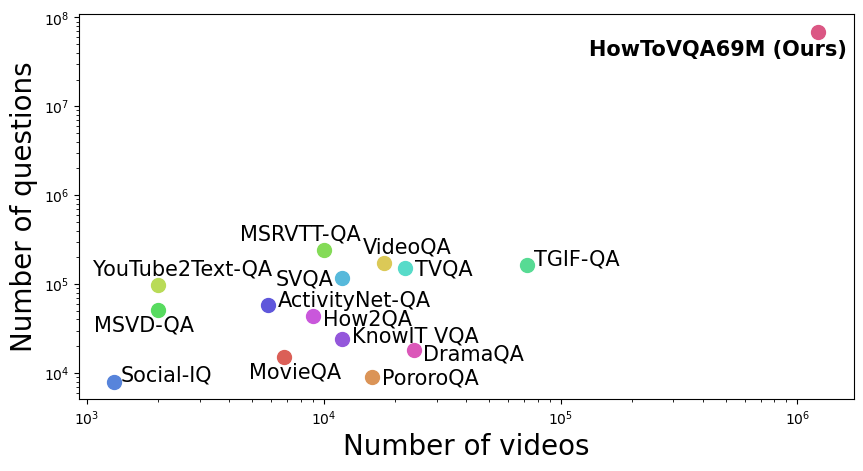

In [3]:
plt.rcdefaults() 
plt.rcParams["figure.figsize"] = (10, 5)

dataset_names = ['MovieQA', 'PororoQA', 'VideoQA', 'YouTube2Text-QA', 'MSRVTT-QA', 'MSVD-QA', 'TGIF-QA', 'TVQA', 'SVQA', 
         'Social-IQ', 'ActivityNet-QA', 'KnowIT VQA', 'How2QA', 'DramaQA', 'HowToVQA69M (Ours)']
nb_videos = [6.8, 16, 18, 2, 10, 2, 72, 22, 12, 1.3, 5.8, 12, 9, 24, 1228] 
nb_videos = [x * 1000 for x in nb_videos]
nb_questions = [15, 9, 175, 99, 244, 51, 165, 152, 118, 8, 58, 24, 44, 18, 69270] 
nb_questions = [x * 1000 for x in nb_questions]
current_palette = sns.color_palette("hls", len(dataset_names))
xytextmap = {name:(5,0) for name in dataset_names}
xytextmap['MovieQA'] = (-25, -15)
xytextmap['PororoQA'] = (7, -5)
xytextmap['DramaQA'] = (7, -7)
xytextmap['YouTube2Text-QA'] = (-47, 7)
xytextmap['MSRVTT-QA'] = (-60, 7)
xytextmap['VideoQA'] = (-15, 7)
xytextmap['MSVD-QA'] = (-46, -15)
xytextmap['How2QA'] = (7, -7)
xytextmap['KnowIT VQA'] = (7, -2)
xytextmap['TVQA'] = (7, -5)
xytextmap['SVQA'] = (-48, -5)
xytextmap['HowToVQA69M (Ours)'] = (-165, -17)
xytextmap['ActivityNet-QA'] = (7, -1)
for video, question, color, name in zip(nb_videos, nb_questions, current_palette, dataset_names):
    plt.scatter(video, question, color = color, label = name, s=100)
    plt.annotate(name, (video, question), xytext = xytextmap[name], textcoords = 'offset points', fontsize = 15, 
                 weight = "bold" if name == "HowToVQA69M (Ours)" else "normal")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of videos", fontsize = 20)
plt.ylabel("Number of questions", fontsize = 20)
plt.margins(0.05, 0.05)
# plt.savefig('figure1.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

# Figure 7

In [12]:
# Load HowToVQA69M
howtovqa = pickle.load(open(os.path.join(HOWTOVQA_PATH, 'howtovqa.pkl'),'rb')) # careful, need a bit of RAM
howtovqa_answers = [y for x in howtovqa.values() for y in x['answer']]
howtovqa_questions = [y for x in howtovqa.values() for y in x['question']]

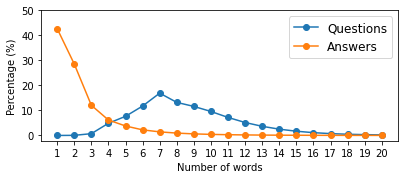

In [13]:
# Lengths of the QAs 
howtovqa_question_lengths = [len(x.split(' ')) for x in howtovqa_questions]
howtovqa_answer_lengths = [len(x.split(' ')) for x in howtovqa_answers]
howtovqa_question_length_counter = collections.Counter(howtovqa_question_lengths)
howtovqa_answer_length_counter = collections.Counter(howtovqa_answer_lengths)
plt.plot(np.arange(1,21), [100 * howtovqa_question_length_counter[i] / len(howtovqa_questions) for i in range(1, 21)], 
         '-o', label = 'Questions')
plt.plot(np.arange(1,21), [100 * howtovqa_answer_length_counter[i] / len(howtovqa_answers) for i in range(1, 21)], 
         '-o', label = 'Answers')
plt.xlabel('Number of words')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
plt.yticks([0, 10, 20, 30, 40, 50], [0, 10, 20, 30, 40, 50])
plt.legend(loc = 'upper right', fontsize = 'large')
plt.rcParams["figure.figsize"] = (6.4, 2.4)
# plt.savefig('howtovqa_lengths.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

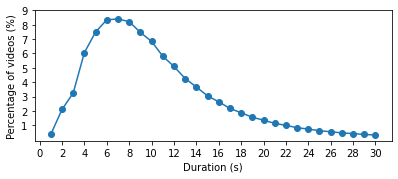

In [14]:
# Duration of the clips
howtovqa_clips = [y for x in howtovqa.values() for y in set(list(zip(x['start'], x['end'])))]
howtovqa_clips_durations = [y[1] - y[0] for y in howtovqa_clips]
howtovqa_durations = [round(x) for x in howtovqa_clips_durations]
howtovqa_durations_counter = collections.Counter(howtovqa_durations)
plt.plot(np.arange(1, 31), [100 * howtovqa_durations_counter[i] / len(howtovqa_durations) for i in range(1, 31)], '-o')
plt.ylabel("Percentage of videos (%)")
plt.xlabel("Duration (s)")
plt.xticks([2 * i for i in range(32 // 2)], [2 * i for i in range(32 // 2)])
plt.yticks(np.arange(1, 10), np.arange(1, 10))
plt.rcParams["figure.figsize"] = (6.4, 2.4)
# plt.savefig('howtovqa_durations.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

# HowToVQA Statistics

In [16]:
print("Number of v-q-a triplets", len(howtovqa_questions))
print("Average number of video clips per unique video", len(howtovqa_clips) / len(howtovqa))
print("Average duration of video clips", sum(howtovqa_clips_durations) / len(howtovqa_clips_durations))
print("Average number of QAs per video clip", len(howtovqa_questions) / len(howtovqa_clips))
print("Average number of words in the questions", sum(howtovqa_question_lengths) / len(howtovqa_question_lengths))
print("Average number of words in the answers", sum(howtovqa_answer_lengths) / len(howtovqa_answer_lengths))
unique_answers = collections.Counter(howtovqa_answers).most_common()
print("Number of unique answers", len(unique_answers))
print("Number of answers appearing more than once", len([x for x in unique_answers if x[1] > 1]))
print("Number of answers appearing more than ten times", len([x for x in unique_answers if x[1] > 10]))

Number of v-q-a triplets 69270581
Average number of video clips per unique video 46.71799707774897
Average duration of video clips 11.550099786196274
Average number of QAs per video clip 1.2069455746336075
Average number of words in the questions 8.661156328398631
Average number of words in the answers 2.351681892201828
Number of unique answers 16866077
Number of answers appearing more than once 2429030
Number of answers appearing more than ten times 333604


# Figure 8

In [7]:
# Sample 1M of examples for Word Clouds
howtovqa_answers_sample = np.random.choice(howtovqa_answers, 1000000, replace = False)
howtovqa_questions_sample = np.random.choice(howtovqa_questions, 1000000, replace = False)

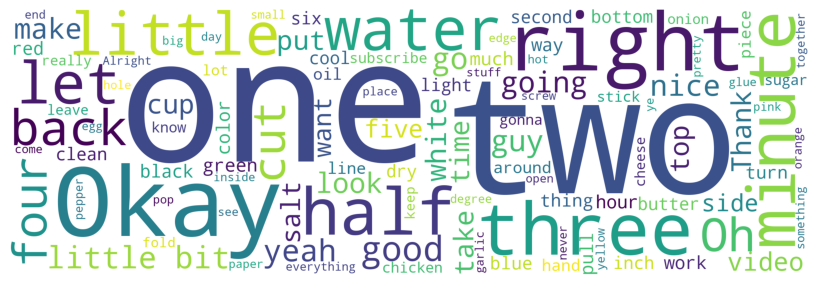

In [8]:
howtovqa_answer_wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='white', 
                min_font_size = 30).generate(" ".join(howtovqa_answers_sample))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(howtovqa_answer_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('howtovqa_answer_cloud.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

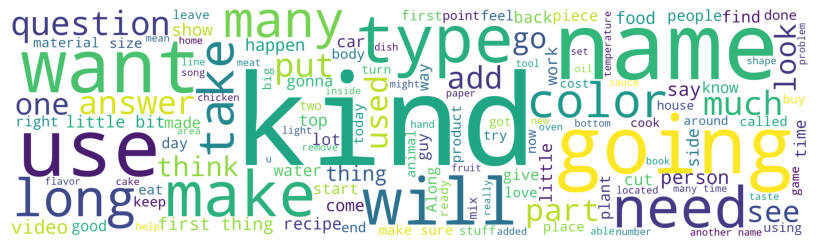

In [9]:
howtovqa_question_wordcloud = WordCloud(width = 2800, height = 800, 
                background_color ='white', 
                min_font_size = 30).generate(" ".join(howtovqa_questions_sample))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(howtovqa_question_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('howtovqa_question_cloud.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

# Figure 12

In [5]:
# Load iVQA
ivqa_train = pd.read_csv(os.path.join(IVQA_PATH, 'train.csv'))
ivqa_val = pd.read_csv(os.path.join(IVQA_PATH, 'val.csv'))
ivqa_test = pd.read_csv(os.path.join(IVQA_PATH, 'test.csv'))
ivqa_df = pd.concat([ivqa_train, ivqa_val, ivqa_test])

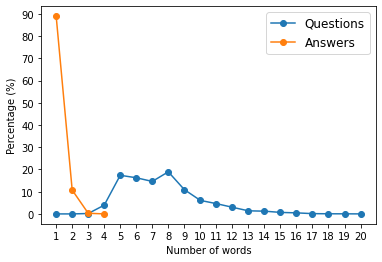

In [7]:
# Lengths of the QAs 
ivqa_answers = list(ivqa_df['answer1']) + list(ivqa_df['answer2']) + list(ivqa_df['answer3']) + list(ivqa_df['answer4']) + list(ivqa_df['answer5'])
ivqa_answers = [str(ans) for ans in ivqa_answers]
ivqa_questions = list(ivqa_df['question'])
ivqa_answer_lengths = [len(str(a).split(' ')) for a in ivqa_answers]
ivqa_question_lengths = [len(str(q).split(' ')) for q in ivqa_questions]
ivqa_answer_length_counter = collections.Counter(ivqa_answer_lengths)
ivqa_question_length_counter = collections.Counter(ivqa_question_lengths)
plt.plot(np.arange(1, 21), [100 * ivqa_question_length_counter[i] / len(ivqa_questions) for i in range(1, 21)], 
         '-o', label = 'Questions')
plt.plot(np.arange(1, 5), [100 * ivqa_answer_length_counter[i] / len(ivqa_answers) for i in range(1, 5)], 
         '-o', label = 'Answers')
plt.xlabel('Number of words')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.legend(loc='upper right', fontsize = 'large')
plt.rcParams["figure.figsize"] = (6.4, 2.4)
# plt.savefig('ivqa_lengths.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

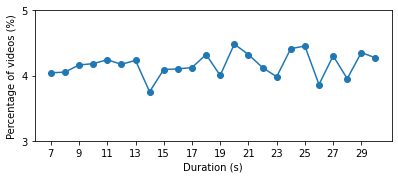

In [8]:
# Clip durations
ivqa_ends = list(ivqa_df['end'])
ivqa_starts = list(ivqa_df['start'])
ivqa_durations = [int(x) - int(y) + 1 for x, y in zip(ivqa_ends, ivqa_starts)]
plt.plot(np.arange(7, 31), [100 * ivqa_durations.count(i) / len(ivqa_durations) for i in range(7, 31)], '-o')
plt.ylabel("Percentage of videos (%)")
plt.xlabel("Duration (s)")
plt.xticks([7 + 2 * i for i in range(12)], [7 + 2 * i for i in range(12)])
plt.yticks(np.arange(3, 6), np.arange(3, 6))
plt.rcParams["figure.figsize"] = (6.4, 2.4)
# plt.savefig('ivqa_durations.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

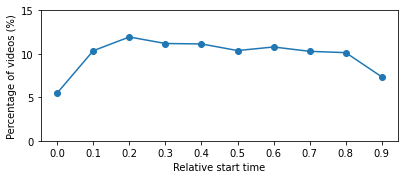

In [11]:
# Clip relative start time
original_durations_pkl = pickle.load(open(os.path.join(IVQA_PATH, 'original_durations.pkl'), 'rb'))
original_durations = [original_durations_pkl[row['video_id']] for i, row in ivqa_df.iterrows()]
starts_relative = [row['start'] / original_durations_pkl[row['video_id']] for i, row in ivqa_df.iterrows()]
starts_relative = [np.around(x, decimals=1) for x in starts_relative]
precision = 10
plt.plot(np.arange(precision) / precision, [100 * starts_relative.count(i / precision) / len(starts_relative) 
                                            for i in range(precision)], '-o')
plt.ylabel("Percentage of videos (%)")
plt.xlabel("Relative start time")
plt.xticks(np.arange(10) / 10, np.arange(10) / 10)
plt.yticks([0, 5, 10, 15], [0, 5, 10, 15])
plt.rcParams["figure.figsize"] = (6.4, 2.4)
# plt.savefig('ivqa_starts.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

# iVQA statistics

In [10]:
print("Average number of words in the iVQA questions", sum([len(x.split(' ')) for x in ivqa_questions]) / len(ivqa_questions))
print("Average number of words in the iVQA answers", sum([len(x.split(' ')) for x in ivqa_answers]) / len(ivqa_answers))
print("Average duration in seconds of the iVQA video clips", sum(ivqa_durations) / len(ivqa_durations))
print("Most common answer percentage", collections.Counter(ivqa_answers).most_common(1)[0][1] / len(ivqa_answers))
perfect = 0
multiple = 0
triple = 0
quadruple = 0
for i, row in ivqa_df.iterrows():
    ans = collections.Counter([row['answer1'], row['answer2'], row['answer3'], row['answer4'], row['answer5']])
    if len(ans) == 1:
        perfect += 1
    if len([x for x in ans if ans[x] >= 2]) == 2:
        multiple += 1
    if len([x for x in ans if ans[x] >= 3]) == 1:
        triple += 1
    if len([x for x in ans if ans[x] >= 4]) == 1:
        quadruple += 1
print("Ratio of 5-annotator consensus", perfect / len(ivqa_df))
print("Ratio of samples with at least a 4-annotator consensus", quadruple / len(ivqa_df))
print("Ratio of samples with at least a 3-annotator consensus", triple / len(ivqa_df))
print("Ratio of samples with two different answers that had a consensus between at least two annotators", 
      multiple / len(ivqa_df))

Average number of words in the iVQA questions 7.583550130078047
Average number of words in the iVQA answers 1.113648188913348
Average duration in seconds of the iVQA video clips 18.568541124674805
Most common answer percentage 0.01304782869721833
Ratio of 5-annotator consensus 0.26996197718631176
Ratio of samples with at least a 4-annotator consensus 0.4841905143085852
Ratio of samples with at least a 3-annotator consensus 0.7730638383029818
Ratio of samples with two different answers that had a consensus between at least two annotators 0.2752651590954573


# Figure 13

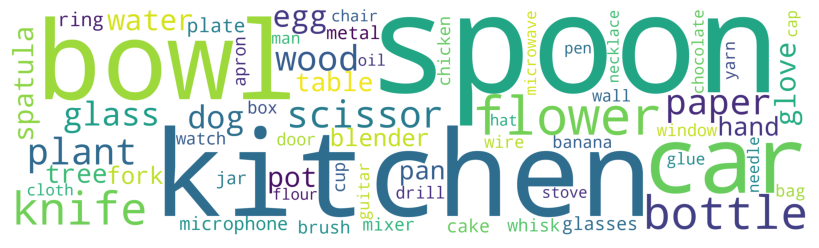

In [14]:
# Answer Word Cloud
ivqa_answer_wordcloud = WordCloud(width = 2800, height = 800, 
                background_color ='white', 
                min_font_size = 40).generate(" ".join(ivqa_answers))
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(ivqa_answer_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('ivqa_answer_cloud.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

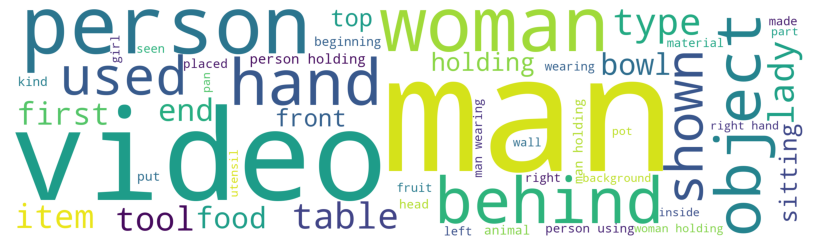

In [15]:
# Question Word Cloud
ivqa_question_wordcloud = WordCloud(width = 2800, height = 800, 
                background_color ='white', 
                min_font_size = 40).generate(" ".join(ivqa_questions))
                          
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(ivqa_question_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('ivqa_question_cloud.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show() 